In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob


In [2]:
rt_dir = r'/home/hectorb/DATA/streamflow/AMMA_Benin/Donga/'
suf_pattern = '.csv'
pre_pattern = 'CL.Run_Od-'
tmp = pd.Series()
filenames = os.path.join(rt_dir,'*'.join([''.join([pre_pattern,'ARA_PONT']),suf_pattern]))        
flags_gap = pd.Series()
data_col = 2
index_col = 0
Qara = pd.DataFrame()

for filename in glob.glob(filenames):
    df = pd.read_csv(filename, comment ='#', sep =';',header=None,na_values=[''])
    data = df[data_col]
    data.index = pd.to_datetime(df[index_col])
    if data.index.year[100] == 2013:    
        data = data.resample('10min').mean()
    tmp = pd.concat([tmp,data])
    flags_gap = pd.concat([flags_gap,data[data<0]])

        

tmp[tmp<0] = np.nan    
Q = tmp


#~ sta.Q = sta.Q*sta.Q.index.to_series().diff().dt.total_seconds().fillna(0)
Qara['Q']=Q*10*60.*1000./12000000.
Qara['Qmm'] = Q*3600.*1000./12000000
#~ df2=df2.resample('H').sum()


/tmp/ipykernel_17209/513992618.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tmp = pd.Series()
/tmp/ipykernel_17209/513992618.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  flags_gap = pd.Series()
/tmp/ipykernel_17209/513992618.py:12: DtypeWarning: Columns (5,8,13,14,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, comment ='#', sep =';',header=None,na_values=[''])
/tmp/ipykernel_17209/513992618.py:12: DtypeWarning: Columns (5,8,13,14,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, comment ='#', sep =';',header=None,na_values=[''])
/tmp/ipykernel_17209/513992618.py:12: DtypeWarning: Columns (5,8,13,14,25,26) have mixed types

<AxesSubplot:>

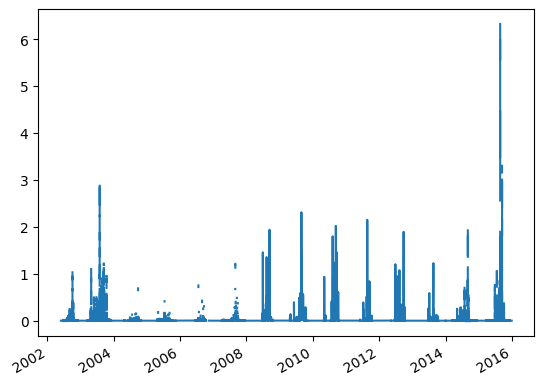

In [3]:
Qara['Q'].plot()

In [4]:
t = Qara.index.to_julian_date() - Qara.index.to_julian_date().min()
t.sort_values()

Float64Index([                  0.0, 0.0069444444961845875,
               0.013888888992369175,  0.020833333488553762,
                0.02777777798473835,   0.03472222248092294,
               0.041666666977107525,  0.048611111007630825,
                0.05555555550381541,                0.0625,
              ...
                  4963.180555555504,             4963.1875,
                  4963.194444444496,     4963.201388888992,
                  4963.208333333489,     4963.215277777985,
                  4963.222222222481,     4963.229166666977,
                  4963.236111111008,     4963.243055555504],
             dtype='float64', length=748718)

In [5]:
julian_date_years=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qara.index.year)]).index.to_julian_date()

/tmp/ipykernel_17209/3231224253.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  julian_date_years=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qara.index.year)]).index.to_julian_date()
/tmp/ipykernel_17209/3231224253.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  julian_date_years=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qara.index.year)]).index.to_julian_date()


In [6]:
Q2 = pd.DataFrame(Qara['Q'])
julian_date_years=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qara.index.year)]).index.to_julian_date()
Q2['date'] = Qara.index.to_julian_date() - julian_date_years

/tmp/ipykernel_17209/495554760.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  julian_date_years=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qara.index.year)]).index.to_julian_date()
/tmp/ipykernel_17209/495554760.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  julian_date_years=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qara.index.year)]).index.to_julian_date()


In [7]:
Q2

Q        date
2011-01-01 00:00:00  0.0    0.000000
2011-01-01 00:10:00  0.0    0.006944
2011-01-01 00:20:00  0.0    0.013889
2011-01-01 00:30:00  0.0    0.020833
2011-01-01 00:40:00  0.0    0.027778
...                  ...         ...
2009-12-31 22:00:00  0.0  364.916667
2009-12-31 22:10:00  0.0  364.923611
2009-12-31 22:20:00  0.0  364.930556
2009-12-31 22:30:00  0.0  364.937500
2009-12-31 23:00:00  0.0  364.958333

[748718 rows x 2 columns]

In [8]:
#pd.pivot_table(Qara['Q'],index=Qara.index.dayofyear,columns=Qara.index.year)

Q3 = pd.pivot_table(Q2,index=Q2['date'],columns=Q2.index.year)

#dat['decimal_date']=dat.index.year+ (dat.index.dayofyear -1)/365

In [9]:
Q3.loc[(Q3.index>=100) & (Q3.index<=300),:].plot(subplots=True,layout=(5,3),
                                                 linestyle='-',marker='o',markersize=0.4,
                                                 figsize=(12,12),color='k',ylabel='mm/10mn',
                                                sharey=True,logy=True)

plt.tight_layout()
plt.gcf().subplots_adjust(hspace=0.1)
plt.savefig(r'/home/hectorb/DATA/streamflow/AMMA_Benin/figures/Q_Ara_mm.png')


Lecture des données du Parshall

In [10]:
rt_dir2 = r'/home/hectorb/DATA/streamflow/AMMA_Benin/Nalohou/CE.Run_Odc_BD_AMMA-CATCH_2016_03_01/'
suf_pattern = '.csv'
pre_pattern = 'CE.Run_Odc-'
tmp = pd.Series()
filenames = os.path.join(rt_dir2,'*'.join([''.join([pre_pattern,'PARSHALL']),suf_pattern]))        
flags_gap = pd.Series()
data_col = 2
index_col = 0
Qp = pd.DataFrame()

for filename in glob.glob(filenames):
    df = pd.read_csv(filename, comment ='#', sep =';',header=None,na_values=[''])
    data = df[data_col]
    data.index = pd.to_datetime(df[index_col])
    tmp = pd.concat([tmp,data],axis=0)
    flags_gap = pd.concat([flags_gap,data[data<0]])

tmp[tmp<0] = np.nan    
Qp = tmp


#~ sta.Q = sta.Q*sta.Q.index.to_series().diff().dt.total_seconds().fillna(0)
Qp=Qp*15*60.*1000./160000.
Qp[Qp>1000]=np.nan

#Qara['Qmm'] = Q*3600.*1000./120000
#~ df2=df2.resample('H').sum()


/tmp/ipykernel_17209/677963816.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tmp = pd.Series()
/tmp/ipykernel_17209/677963816.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  flags_gap = pd.Series()


<AxesSubplot:>

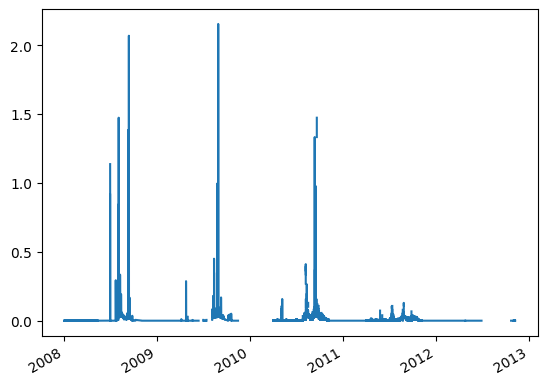

In [11]:
Qp.plot()

In [12]:
julian_date_yearsp=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qp.index.year)]).index.to_julian_date()

/tmp/ipykernel_17209/1273488237.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  julian_date_yearsp=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qp.index.year)]).index.to_julian_date()
/tmp/ipykernel_17209/1273488237.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  julian_date_yearsp=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qp.index.year)]).index.to_julian_date()


In [13]:
Qp2 = pd.DataFrame(Qp)
julian_date_years2=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qp.index.year)]).index.to_julian_date()
Qp2['date'] = Qp.index.to_julian_date() - julian_date_years2

/tmp/ipykernel_17209/1948156443.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  julian_date_years2=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qp.index.year)]).index.to_julian_date()
/tmp/ipykernel_17209/1948156443.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  julian_date_years2=pd.Series(index=[ pd.datetime(y,1,1) for y in list(Qp.index.year)]).index.to_julian_date()


In [14]:
#pd.pivot_table(Qara['Q'],index=Qara.index.dayofyear,columns=Qara.index.year)

Qp3 = pd.pivot_table(Qp2,index=Qp2['date'],columns=Qp2.index.year)
Qp3
#dat['decimal_date']=dat.index.year+ (dat.index.dayofyear -1)/365

0                    
           2008 2009 2010 2011 2012
date                               
0.000000    NaN  0.0  NaN  NaN  NaN
0.010417    NaN  0.0  NaN  NaN  NaN
0.020833    NaN  0.0  NaN  NaN  NaN
0.031250    NaN  0.0  NaN  NaN  NaN
0.041667    NaN  0.0  NaN  NaN  NaN
...         ...  ...  ...  ...  ...
339.427083  0.0  NaN  NaN  NaN  NaN
339.437500  0.0  NaN  NaN  NaN  NaN
339.447917  0.0  NaN  NaN  NaN  NaN
339.458333  0.0  NaN  NaN  NaN  NaN
339.468750  0.0  NaN  NaN  NaN  NaN

[32590 rows x 5 columns]

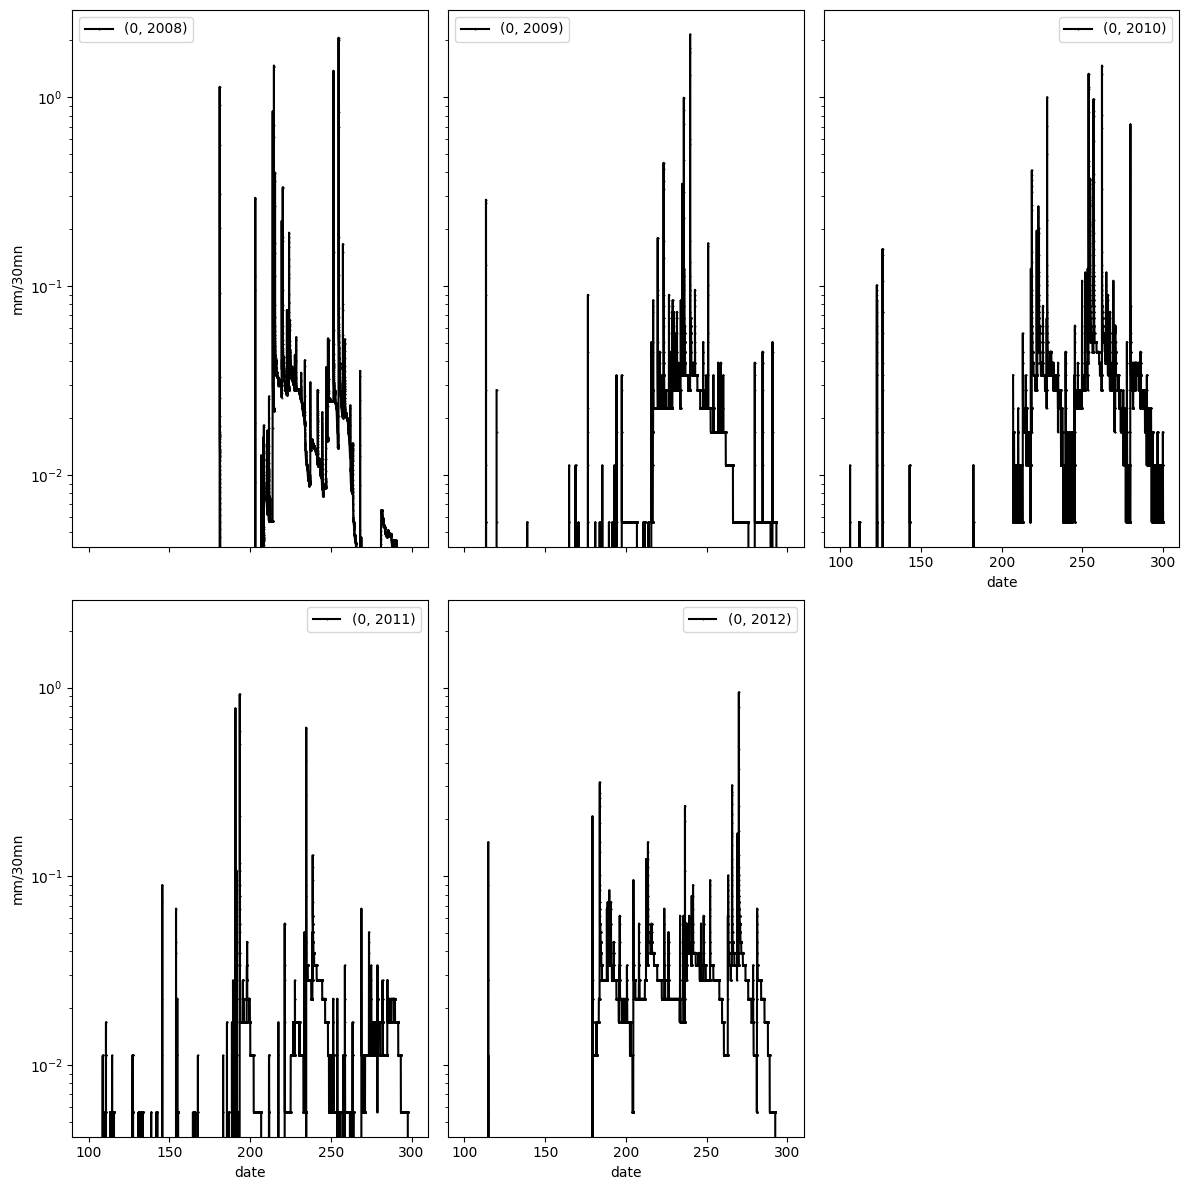

In [15]:
Qp3.loc[(Qp3.index>=100) & (Qp3.index<=300),:].plot(subplots=True,layout=(2,3),
                                                 linestyle='-',marker='o',markersize=0.4,
                                                 figsize=(12,12),color='k',ylabel='mm/30mn',
                                                sharey=True,logy=True)
plt.tight_layout()
plt.gcf().subplots_adjust(hspace=0.1)
plt.savefig(r'/home/hectorb/DATA/streamflow/AMMA_Benin/figures/Q_parshall_mm.png')


In [16]:
Qara_30mn=Qara['Q'].resample('30min').sum()
Qp_30mn=pd.DataFrame({'Q':Qp.resample('30min').sum()})

In [17]:
Qp_30mn.sort_index(inplace=True)
Qara_30mn.sort_index(inplace=True)

In [35]:
Qara_30mn.loc[Qara_30mn.index.year==2008].rename('ara')

2008-01-01 00:00:00    0.0
2008-01-01 00:30:00    0.0
2008-01-01 01:00:00    0.0
2008-01-01 01:30:00    0.0
2008-01-01 02:00:00    0.0
                      ... 
2008-12-31 21:30:00    0.0
2008-12-31 22:00:00    0.0
2008-12-31 22:30:00    0.0
2008-12-31 23:00:00    0.0
2008-12-31 23:30:00    0.0
Freq: 30T, Name: ara, Length: 17568, dtype: float64

In [38]:
Qara_30mn.loc[Qara_30mn.index.year==yr]

2015-01-01 00:00:00    0.0
2015-01-01 00:30:00    0.0
2015-01-01 01:00:00    0.0
2015-01-01 01:30:00    0.0
2015-01-01 02:00:00    0.0
                      ... 
2015-12-30 21:30:00    0.0
2015-12-30 22:00:00    0.0
2015-12-30 22:30:00    0.0
2015-12-30 23:00:00    0.0
2015-12-30 23:30:00    0.0
Freq: 30T, Name: Q, Length: 17472, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


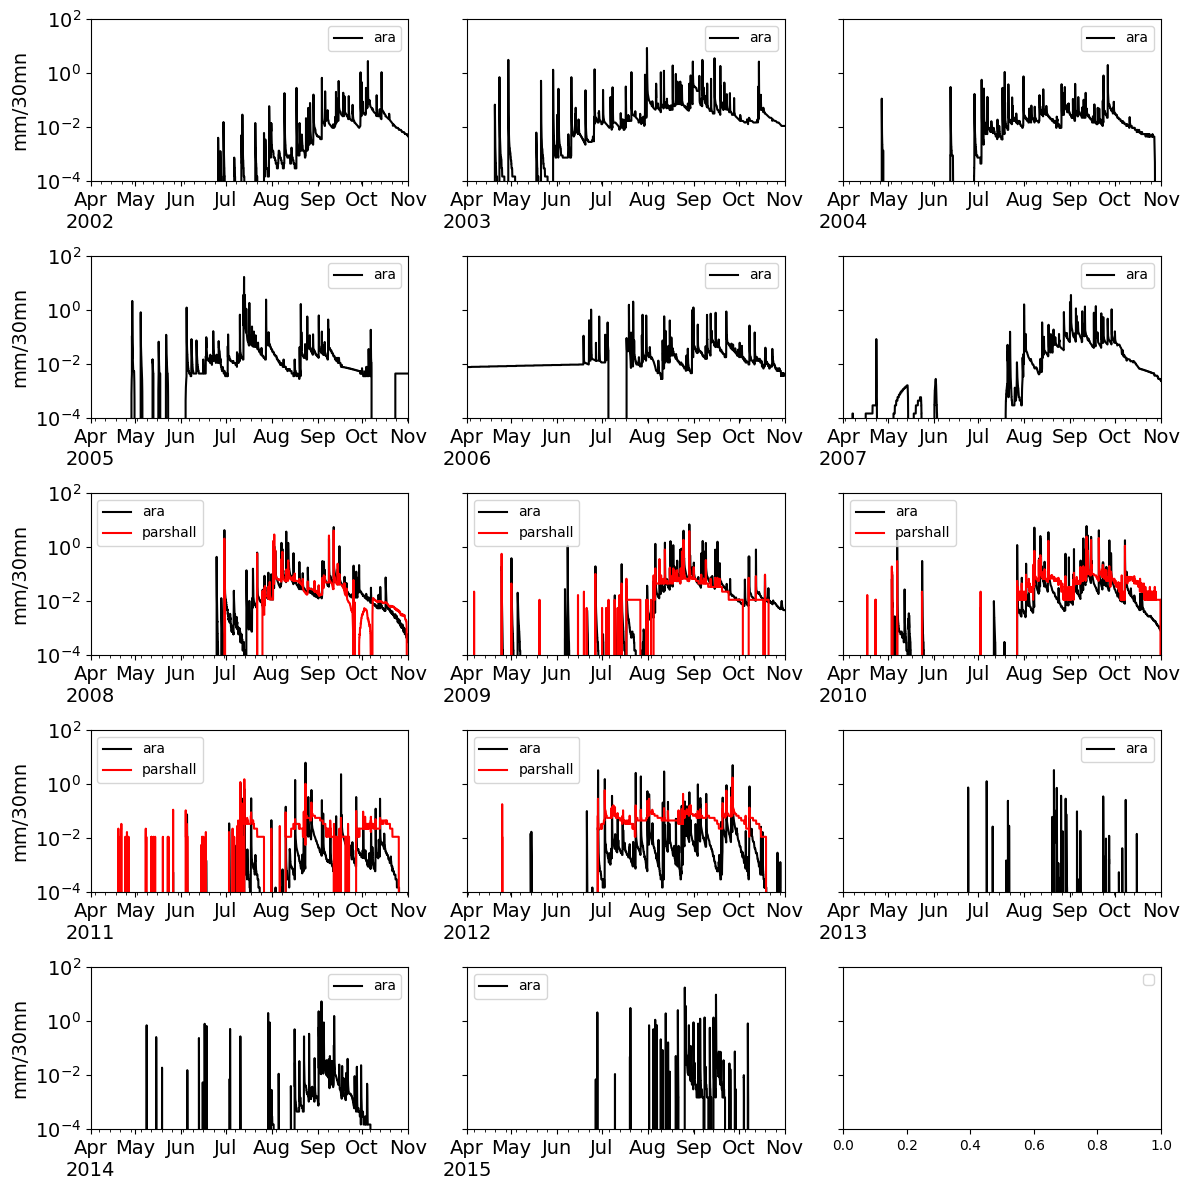

In [53]:
import datetime
fig,ax = plt.subplots(5,3,figsize=(12,12),sharey=True)
for i,yr in enumerate(np.unique(Qara_30mn.index.year)):
    Qara_30mn.loc[Qara_30mn.index.year==yr].rename('ara').dropna().plot(label='ara',
                                                                        ax=ax.flatten()[i],
                                                                        color='k',
                                                                       logy=True,
                                                                       fontsize=14)
    if yr in np.unique(Qp_30mn.index.year):
        Qp_30mn['Q'].loc[Qp_30mn.index.year==yr].rename('parshall').dropna().plot(label='parshall',
                                                                                  ax=ax.flatten()[i],
                                                                                  color='r',
                                                                                 logy=True,
                                                                                 fontsize=14)
    ax.flatten()[i].set_xlim([datetime.datetime(yr,4,1),datetime.datetime(yr,11,1)])
    ax.flatten()[i].set_ylim([0.0001,100])
    ax.flatten()[i].legend()

for a in ax.flatten():a.set_ylabel('mm/30mn',fontsize=14)
plt.legend()
        
plt.tight_layout()
#plt.gcf().subplots_adjust(hspace=0.2)
plt.savefig(r'/home/hectorb/DATA/streamflow/AMMA_Benin/figures/Q_Ara_vs_Parshall_30min_mm_log.png')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


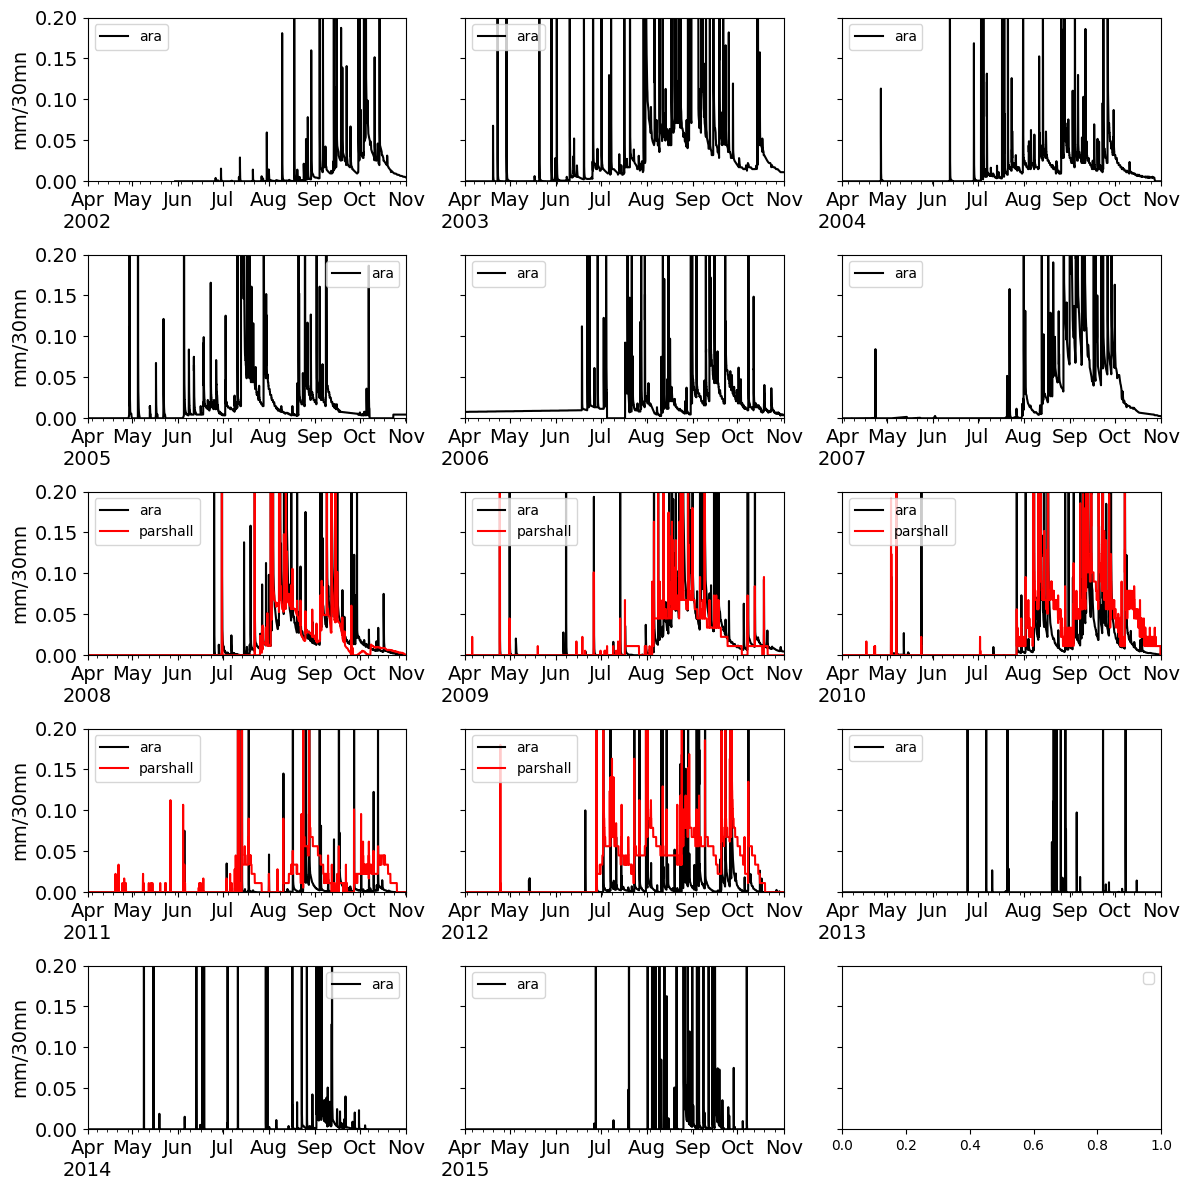

In [55]:
import datetime
fig,ax = plt.subplots(5,3,figsize=(12,12),sharey=True)
for i,yr in enumerate(np.unique(Qara_30mn.index.year)):
    Qara_30mn.loc[Qara_30mn.index.year==yr].rename('ara').dropna().plot(label='ara',
                                                                        ax=ax.flatten()[i],
                                                                        color='k',
                                                                       fontsize=14)
    if yr in np.unique(Qp_30mn.index.year):
        Qp_30mn['Q'].loc[Qp_30mn.index.year==yr].rename('parshall').dropna().plot(label='parshall',
                                                                                  ax=ax.flatten()[i],
                                                                                  color='r',
                                                                                 fontsize=14)
    ax.flatten()[i].set_xlim([datetime.datetime(yr,4,1),datetime.datetime(yr,11,1)])
    ax.flatten()[i].set_ylim([0,0.2])
    ax.flatten()[i].legend()

for a in ax.flatten():a.set_ylabel('mm/30mn',fontsize=14)
plt.legend()
        
plt.tight_layout()
#plt.gcf().subplots_adjust(hspace=0.2)
plt.savefig(r'/home/hectorb/DATA/streamflow/AMMA_Benin/figures/Q_Ara_vs_Parshall_30min_mm.png')

